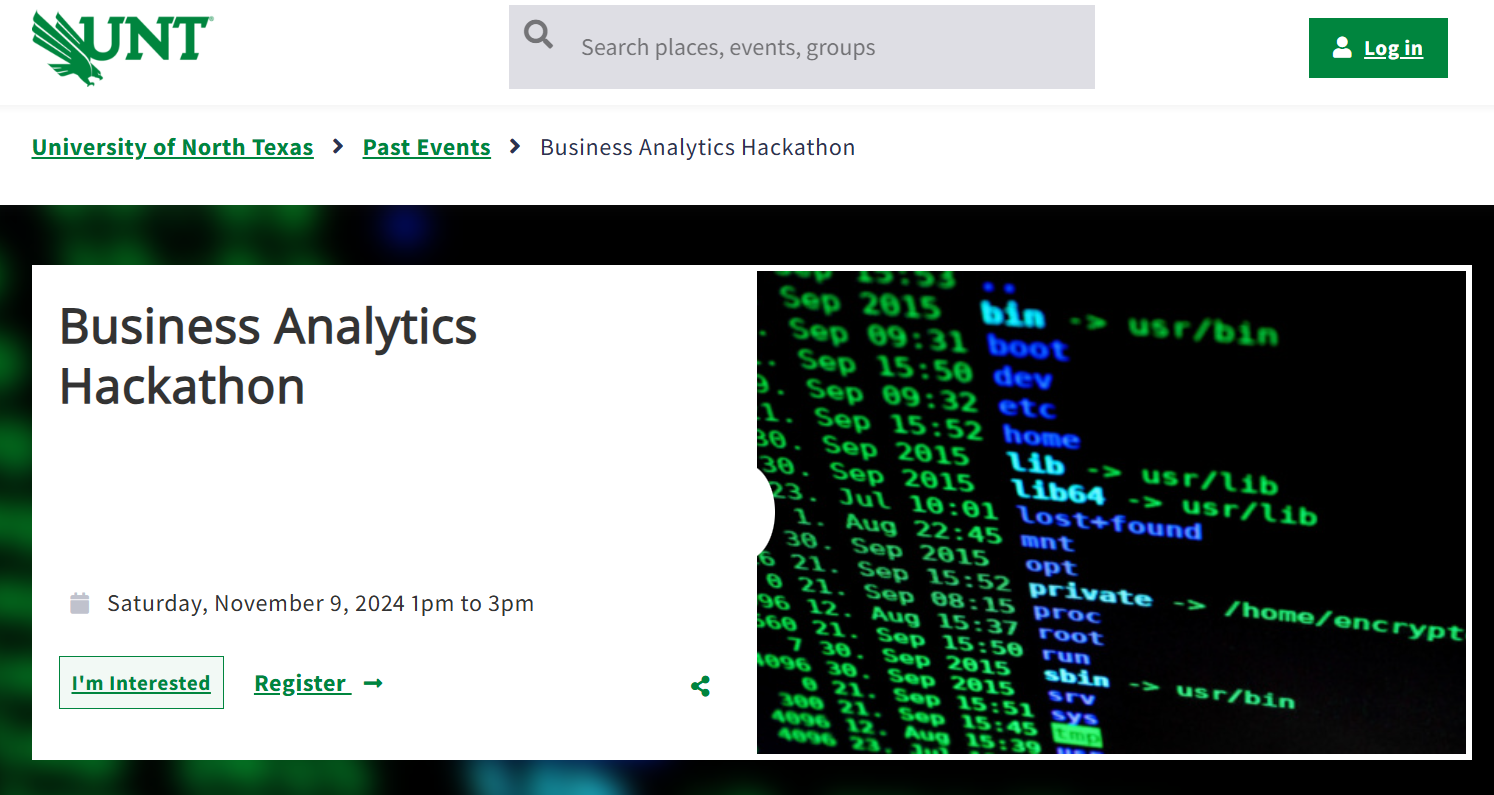

In [3]:
from PIL import Image
URL = '/content/UNT_Business_Analytics_Hack_a_thon.png'
Image = Image.open(URL)
display(Image)


## [Click here to view the competition page](https://calendar.unt.edu/event/business-analytics-hackathon)

I would like to follow the **Data Science Methodology** to solve this problem

## Business Understanding

**Problem Statement**

Peterbilt Motor Company builds Heavy Duty vehicles for On-highway and Vocational applications. The company offers a wide array of build specifications to its customers and delivers a customized product line to support its customers diverse use cases and applications for their vehicles.

The Peterbilt Advanced Analytics team has provided two datasets. Within the first file is a list of attributes (8) and an assigned “Option Code” that were selected for those attributes (Option 1 – 315). Additionally, a file containing warranty claims has been attached. These claims are for the same truck population attached in the set of trucks.

**Business Case**

The Advanced Analytics team at Peterbilt is currently conducting a multivariate analysis, intended to identify attribute pairings that lead to increased warranty costs. The team would like to identify potential approaches to this problem and evaluate students in their ability to take a complex business problem and develop a model or framework to tackle an issue.

**Problem Statement**

The key questions to be addressed include:
1. Which individual attributes or option codes are significantly associated with increased warranty costs?
2. Are there specific pairs of attributes that interact in a way that exacerbates warranty claims?
3. What modeling approaches can effectively quantify these relationships and offer predictive insights for future vehicle configurations?


**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Understanding

File1: **Option Code Information file**

In [5]:
options = pd.read_excel('/content/Option Code Information file for UNT - Final.xlsx')
options = pd.DataFrame(options)
options.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8
0,Truck 1,Style 1,Option 1,Option 83,Option 181,Option 204,Option 264,Option 281,Option 290,Option 294
1,Truck 2,Style 1,Option 2,Option 84,Option 181,Option 205,Option 265,Option 282,Option 291,Option 295
2,Truck 3,Style 1,Option 2,Option 84,Option 181,Option 205,Option 265,Option 282,Option 291,Option 295
3,Truck 4,Style 1,Option 2,Option 84,Option 181,Option 205,Option 265,Option 282,Option 291,Option 295
4,Truck 5,Style 1,Option 2,Option 84,Option 181,Option 205,Option 265,Option 282,Option 291,Option 295


In [6]:
options.shape

(48304, 10)

In [7]:
options.dtypes

,0
Truck,object
Style,object
Attribute 1,object
Attribute 2,object
Attribute 3,object
Attribute 4,object
Attribute 5,object
Attribute 6,object
Attribute 7,object
Attribute 8,object


In [8]:
des_stat = options.describe(include='all')
des_stat

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8
count,48304,48304,48304,48304,48304,48304,48304,48304,48304,48304
unique,48304,16,82,98,23,60,17,9,4,22
top,Truck 48288,Style 4,Option 39,Option 98,Option 185,Option 235,Option 265,Option 284,Option 291,Option 302
freq,1,19079,6641,5231,12971,9754,33479,18137,47505,15014


In [9]:
# Null values
null = options.isnull().sum()
null

,0
Truck,0
Style,0
Attribute 1,0
Attribute 2,0
Attribute 3,0
Attribute 4,0
Attribute 5,0
Attribute 6,0
Attribute 7,0
Attribute 8,0


**Distribution of data points for each column.**

In [10]:
# Since, Truck contains unique values, I am not focussing on finding the distributions of data points for each value.

Style_value_counts = options['Style'].value_counts()
# Style_value_counts

Attribute_1_value_counts = options['Attribute 1'].value_counts()
# Attribute_1_value_counts

Attribute_2_value_counts = options['Attribute 2'].value_counts()
# Attribute_2_value_counts

Attribute_3_value_counts = options['Attribute 3'].value_counts()
# Attribute_3_value_counts

Attribute_4_value_counts = options['Attribute 4'].value_counts()
# Attribute_4_value_counts

Attribute_5_value_counts = options['Attribute 5'].value_counts()
# Attribute_5_value_counts

Attribute_6_value_counts = options['Attribute 6'].value_counts()
# Attribute_6_value_counts

Attribute_7_value_counts = options['Attribute 7'].value_counts()
# Attribute_7_value_counts

Attribute_8_value_counts = options['Attribute 8'].value_counts()
# Attribute_8_value_counts

**Bar Graph (Horizontal )**

In [11]:
# Creating a list for the columns
options_col= list(options.columns)
del (options_col[0])
options_col

['Style',
 'Attribute 1',
 'Attribute 2',
 'Attribute 3',
 'Attribute 4',
 'Attribute 5',
 'Attribute 6',
 'Attribute 7',
 'Attribute 8']

In [12]:
# # Check
# for i in range(1,9):
#     name = options_col[i]
#     print(name)

In [13]:
# Creating a list for the 9 dataframes
df_names = ['Style_value_counts','Attribute_1_value_counts','Attribute_2_value_counts','Attribute_3_value_counts',
            'Attribute_4_value_counts','Attribute_5_value_counts','Attribute_6_value_counts','Attribute_7_value_counts',
            'Attribute_8_value_counts']
df_names

['Style_value_counts',
 'Attribute_1_value_counts',
 'Attribute_2_value_counts',
 'Attribute_3_value_counts',
 'Attribute_4_value_counts',
 'Attribute_5_value_counts',
 'Attribute_6_value_counts',
 'Attribute_7_value_counts',
 'Attribute_8_value_counts']

In [14]:
# for i in range(0,9):
#     df_name_check = df_names[i]
#     print(df_name_check)

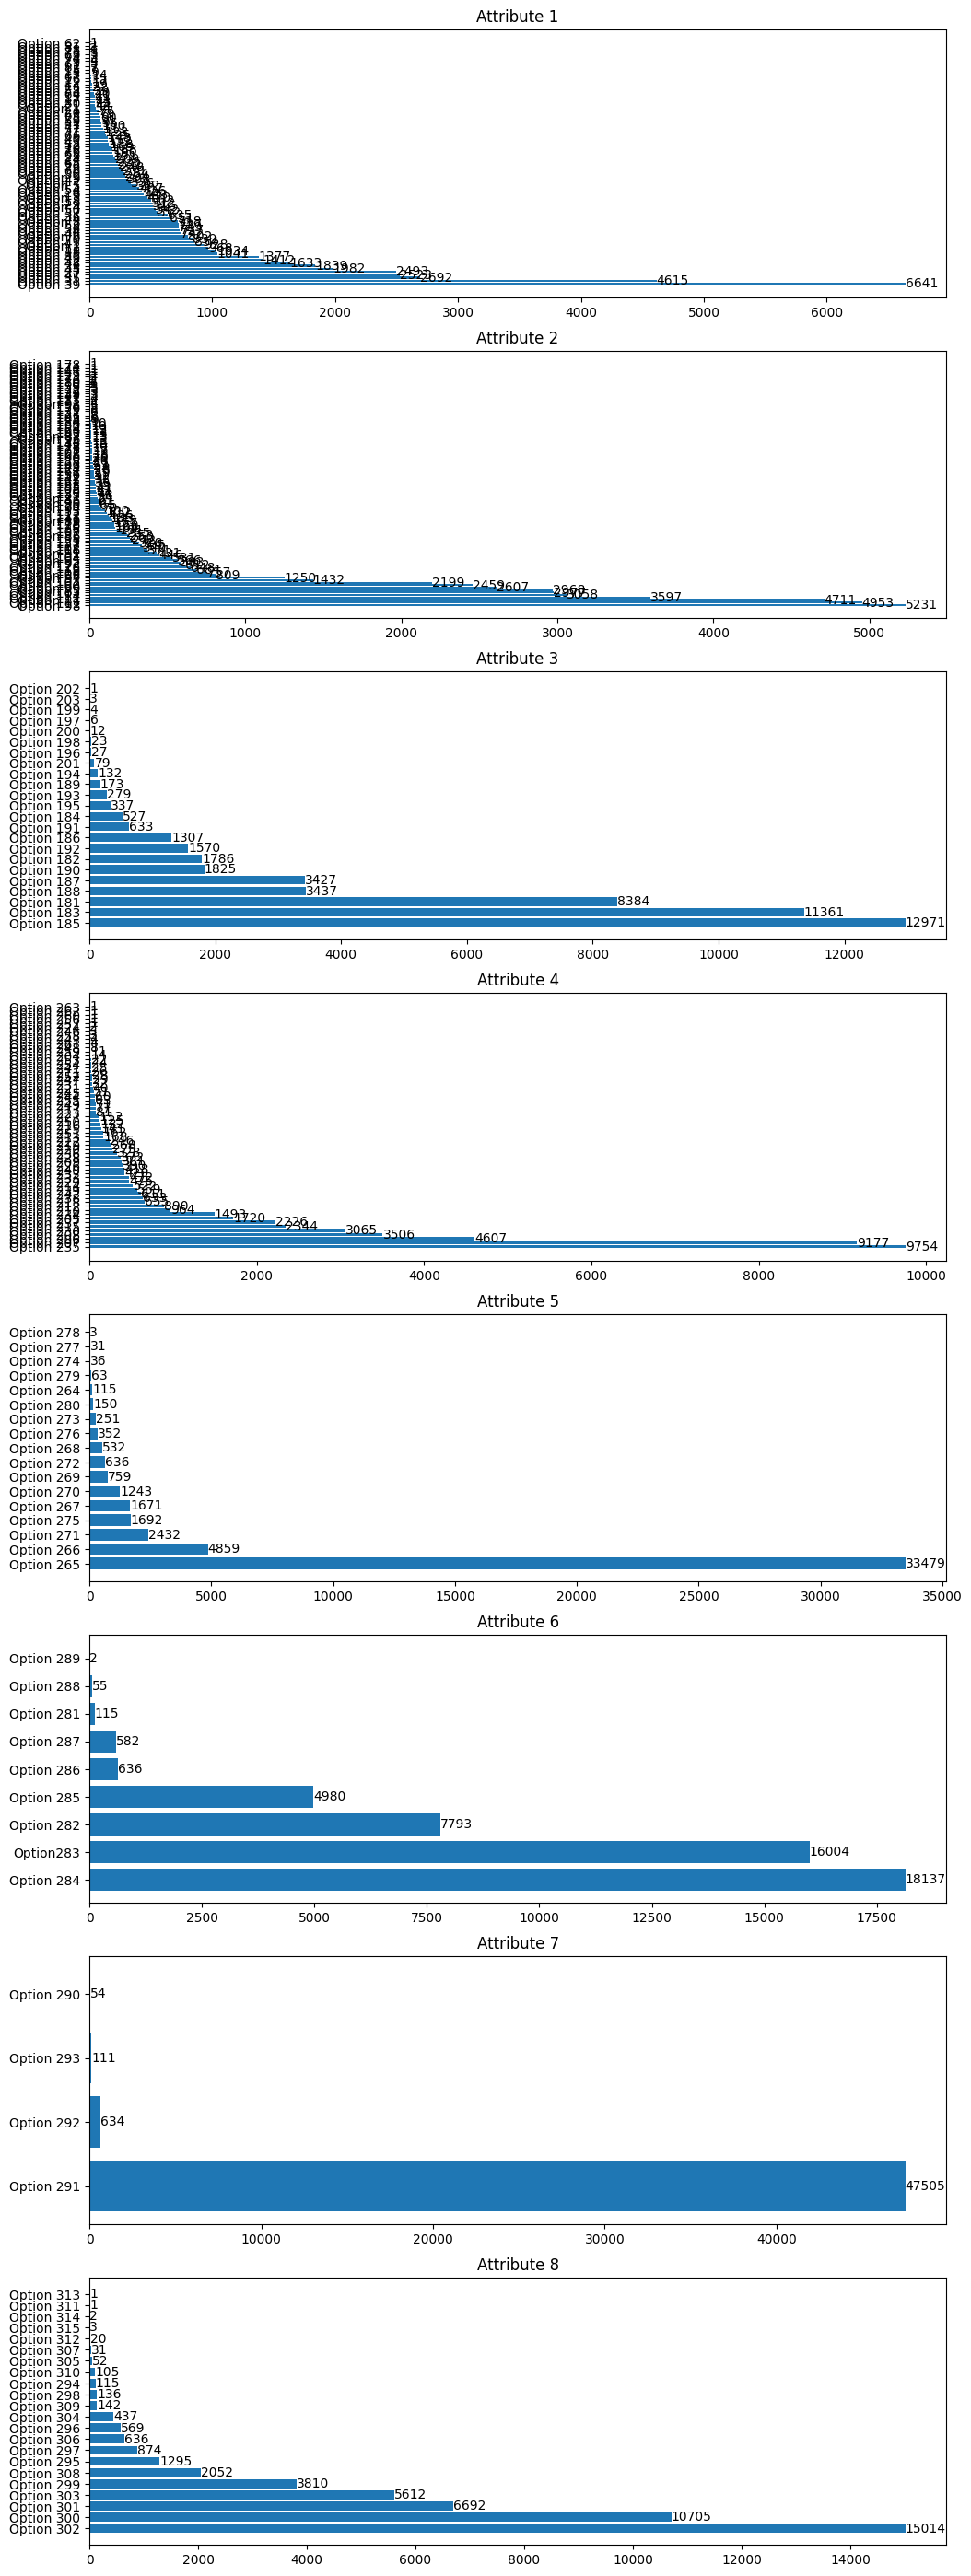

In [15]:
fig = plt.figure(figsize=(12,40))
for i in range(1,9):
    name = options_col[i]
    df_name = eval(df_names[i])
    ax1 = fig.add_subplot(9,1,i)
    ax1.barh(df_name.index, df_name.values)
    # ax1.set_xlabel(name)
    # ax1.set_ylabel('Frequency')
    ax1.bar_label(ax1.containers[0])
    plt.title(name)

plt.show()

In [16]:
import re
data = options.copy()
for col in data.columns[:]:
    data[col] = data[col].str.extract('(\d+)')

data.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-298093960.py:4: SyntaxWarning: invalid escape sequence '\d'
  data[col] = data[col].str.extract('(\d+)')


,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8
0,1,1,1,83,181,204,264,281,290,294
1,2,1,2,84,181,205,265,282,291,295
2,3,1,2,84,181,205,265,282,291,295
3,4,1,2,84,181,205,265,282,291,295
4,5,1,2,84,181,205,265,282,291,295


file 2: **Claim Information File**

In [17]:
claims = pd.read_excel('/content/Claim Information file for UNT.xlsx')
claims = pd.DataFrame(claims)
claims.head()

,Truck Number,Claim Number,Scale Claim Cost,Scale Labor Cost
0,Truck 4208,Claim 1,Very Low,Very Low
1,Truck 22899,Claim 2,Very Low,Very Low
2,Truck 22899,Claim 3,Very Low,Very Low
3,Truck 9983,Claim 4,Very Low,Very Low
4,Truck 2426,Claim 5,Very Low,Very Low


In [18]:
claims.shape

(123361, 4)

In [19]:
claims.dtypes

,0
Truck Number,object
Claim Number,object
Scale Claim Cost,object
Scale Labor Cost,object


In [20]:
claims.describe(include='all')

,Truck Number,Claim Number,Scale Claim Cost,Scale Labor Cost
count,123361,123361,123361,123361
unique,33269,123361,5,5
top,Truck 14075,Claim 123361,Low,Low
freq,101,1,99428,84412


In [21]:
claims.isnull().sum()

,0
Truck Number,0
Claim Number,0
Scale Claim Cost,0
Scale Labor Cost,0


In [22]:
claims.isna().sum()

,0
Truck Number,0
Claim Number,0
Scale Claim Cost,0
Scale Labor Cost,0


In [23]:
claim_value_counts = claims['Claim Number'].value_counts()
# claim_value_counts

Scale_Claim_Cost_val_counts = claims['Scale Claim Cost'].value_counts()
# Scale_Claim_Cost_val_counts

Scale_labor_Cost_val_counts = claims['Scale Labor Cost'].value_counts()
Scale_labor_Cost_val_counts

,count
Scale Labor Cost,
Low,84412
Very Low,37586
Medium,1157
High,196
Very High,10


In [24]:
claims_col = list(claims.columns)
del (claims_col[0:2])
claims_col

['Scale Claim Cost', 'Scale Labor Cost']

In [25]:
df_list = [ 'Scale_Claim_Cost_val_counts', 'Scale_labor_Cost_val_counts']
df_list

['Scale_Claim_Cost_val_counts', 'Scale_labor_Cost_val_counts']

In [26]:
for i in range(1,2):
    name = claims_col[i]
    df_names2 = eval(df_list[i])
print(name)
print(df_names2)

Scale Labor Cost
Scale Labor Cost
Low          84412
Very Low     37586
Medium        1157
High           196
Very High       10
Name: count, dtype: int64


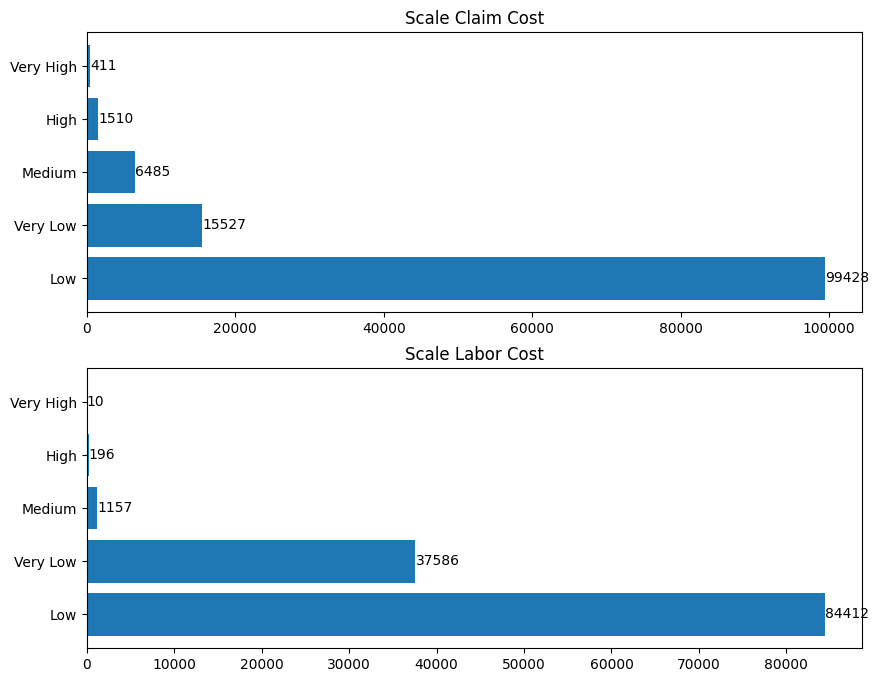

In [27]:
fig = plt.figure(figsize=(10,8))
for i in range(len(df_list)):
    name = claims_col[i]
    df_names2 = eval(df_list[i])
    ax1 = fig.add_subplot(len(df_list),1,i+1)
    ax1.barh(df_names2.index, df_names2.values)
    ax1.bar_label(ax1.containers[0])
    plt.title(name)
plt.show()

In [28]:
claims.head()

,Truck Number,Claim Number,Scale Claim Cost,Scale Labor Cost
0,Truck 4208,Claim 1,Very Low,Very Low
1,Truck 22899,Claim 2,Very Low,Very Low
2,Truck 22899,Claim 3,Very Low,Very Low
3,Truck 9983,Claim 4,Very Low,Very Low
4,Truck 2426,Claim 5,Very Low,Very Low


In [29]:
Truck_4208 = claims[claims['Truck Number'] == 'Truck 4208']
Truck_4208

,Truck Number,Claim Number,Scale Claim Cost,Scale Labor Cost
0,Truck 4208,Claim 1,Very Low,Very Low
1971,Truck 4208,Claim 1972,Very Low,Very Low
21013,Truck 4208,Claim 21014,Low,Low
81178,Truck 4208,Claim 81179,Low,Very Low
81443,Truck 4208,Claim 81444,Low,Very Low
85893,Truck 4208,Claim 85894,Low,Low
93342,Truck 4208,Claim 93343,Low,Very Low
96946,Truck 4208,Claim 96947,Low,Low
112906,Truck 4208,Claim 112907,Medium,Medium


In [30]:
claims_new = claims.groupby(['Truck Number', 'Scale Claim Cost', 'Scale Labor Cost'], as_index=False)['Claim Number'].count()
claims_new.shape

(58518, 4)

In [ ]:
# Sample check for Truck 4208
claims_new[claims_new['Truck Number'] == 'Truck 4208']

,Truck Number,Scale Claim Cost,Scale Labor Cost,Claim Number
43420,Truck 4208,Low,Low,3
43421,Truck 4208,Low,Very Low,3
43422,Truck 4208,Medium,Medium,1
43423,Truck 4208,Very Low,Very Low,2


### Since, Scale Claim Cost, Scale Labor Cost are in categorical, I want to convert it into numeric to build machine learning model.

In [31]:
dummy = pd.get_dummies(claims_new[['Scale Claim Cost', 'Scale Labor Cost']]).astype('int')
dummy.head(5)

,Scale Claim Cost_High,Scale Claim Cost_Low,Scale Claim Cost_Medium,Scale Claim Cost_Very High,Scale Claim Cost_Very Low,Scale Labor Cost_High,Scale Labor Cost_Low,Scale Labor Cost_Medium,Scale Labor Cost_Very High,Scale Labor Cost_Very Low
0,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1


In [32]:
print(claims_new.shape)
print(dummy.shape)

(58518, 4)
(58518, 10)


In [33]:
final_claims = pd.concat([claims_new, dummy], axis=1)
final_claims.drop(['Scale Claim Cost', 'Scale Labor Cost'], axis=1, inplace=True)
final_claims.head()

,Truck Number,Claim Number,Scale Claim Cost_High,Scale Claim Cost_Low,Scale Claim Cost_Medium,Scale Claim Cost_Very High,Scale Claim Cost_Very Low,Scale Labor Cost_High,Scale Labor Cost_Low,Scale Labor Cost_Medium,Scale Labor Cost_Very High,Scale Labor Cost_Very Low
0,Truck 1,9,0,1,0,0,0,0,1,0,0,0
1,Truck 1,1,0,0,1,0,0,0,0,1,0,0
2,Truck 1,1,0,0,0,1,0,0,0,0,0,1
3,Truck 1,1,0,0,0,0,1,0,0,0,0,1
4,Truck 10,1,1,0,0,0,0,0,0,0,0,1


In [34]:
col = list(final_claims.columns)
del (col[0])
col

['Claim Number',
 'Scale Claim Cost_High',
 'Scale Claim Cost_Low',
 'Scale Claim Cost_Medium',
 'Scale Claim Cost_Very High',
 'Scale Claim Cost_Very Low',
 'Scale Labor Cost_High',
 'Scale Labor Cost_Low',
 'Scale Labor Cost_Medium',
 'Scale Labor Cost_Very High',
 'Scale Labor Cost_Very Low']

In [ ]:
# ff = final_claims.groupby(['Truck Number'])[col].sum()
# ff

In [35]:
claims_new = claims.groupby(['Truck Number', 'Scale Claim Cost', 'Scale Labor Cost'], as_index=False)['Claim Number'].count()
claims_new.head()

,Truck Number,Scale Claim Cost,Scale Labor Cost,Claim Number
0,Truck 1,Low,Low,9
1,Truck 1,Medium,Medium,1
2,Truck 1,Very High,Very Low,1
3,Truck 1,Very Low,Very Low,1
4,Truck 10,High,Very Low,1


Tranforming scale claim cost and scale labor cost columns into numeric variables and adding them to get a common value(**Warranty Cost Column**).

In [36]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# claims_new['Scale Claim Cost Encoded'] = encoder.fit_transform(claims_new['Scale Claim Cost'])
# claims_new['Scale Labor Cost Encoded'] = encoder.fit_transform(claims_new['Scale Labor Cost'])


In [37]:
# cl = claims_new.copy()
claims_new['Scale Claim Cost Encoded'] = np.select([claims_new['Scale Claim Cost'] == 'Very Low',
                                                    claims_new['Scale Claim Cost'] == 'Low',
                                                    claims_new['Scale Claim Cost'] == 'Medium',
                                                    claims_new['Scale Claim Cost'] == 'High',
                                                    claims_new['Scale Claim Cost'] == 'Very High'], [1,2,3,4,5], default=np.nan)


containers = [claims_new['Scale Labor Cost'] == 'Very Low',
              claims_new['Scale Labor Cost'] == 'Low',
              claims_new['Scale Labor Cost'] == 'Medium',
              claims_new['Scale Labor Cost'] == 'High',
              claims_new['Scale Labor Cost'] == 'Very High']
values = [1,2,3,4,5]
claims_new['Scale Labor Cost Encoded'] = np.select(containers, values, default=np.nan)
claims_new['Scale Labor Cost Encoded'] = claims_new['Scale Labor Cost Encoded'].astype('int')
claims_new['Scale Claim Cost Encoded'] = claims_new['Scale Claim Cost Encoded'].astype('int')



In [38]:
claims_new.head()

,Truck Number,Scale Claim Cost,Scale Labor Cost,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded
0,Truck 1,Low,Low,9,2,2
1,Truck 1,Medium,Medium,1,3,3
2,Truck 1,Very High,Very Low,1,5,1
3,Truck 1,Very Low,Very Low,1,1,1
4,Truck 10,High,Very Low,1,4,1


In [39]:
print(claims_new['Scale Claim Cost'].unique())
print(claims_new['Scale Claim Cost Encoded'].unique())


['Low' 'Medium' 'Very High' 'Very Low' 'High']
[2 3 5 1 4]


In [40]:

claims_new['Warranty Cost'] = claims_new[['Scale Claim Cost Encoded', 'Scale Labor Cost Encoded']].sum(axis=1)
claims_new.head()

,Truck Number,Scale Claim Cost,Scale Labor Cost,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
0,Truck 1,Low,Low,9,2,2,4
1,Truck 1,Medium,Medium,1,3,3,6
2,Truck 1,Very High,Very Low,1,5,1,6
3,Truck 1,Very Low,Very Low,1,1,1,2
4,Truck 10,High,Very Low,1,4,1,5


In [41]:
data = data.astype('int')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48304 entries, 0 to 48303
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Truck        48304 non-null  int64
 1   Style        48304 non-null  int64
 2   Attribute 1  48304 non-null  int64
 3   Attribute 2  48304 non-null  int64
 4   Attribute 3  48304 non-null  int64
 5   Attribute 4  48304 non-null  int64
 6   Attribute 5  48304 non-null  int64
 7   Attribute 6  48304 non-null  int64
 8   Attribute 7  48304 non-null  int64
 9   Attribute 8  48304 non-null  int64
dtypes: int64(10)
memory usage: 3.7 MB


In [43]:
data.describe()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8
count,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000,48304.000000
mean,24152.500000,4.713875,36.359535,103.799188,184.792212,220.780494,266.338274,283.509212,291.016603,301.294572
std,13944.308038,2.112092,15.314625,14.485337,3.163480,13.550069,2.781510,1.020137,0.152183,2.426552
min,1.000000,1.000000,1.000000,83.000000,181.000000,204.000000,264.000000,281.000000,290.000000,294.000000
25%,12076.750000,3.000000,31.000000,98.000000,183.000000,207.000000,265.000000,283.000000,291.000000,300.000000
50%,24152.500000,4.000000,38.000000,101.000000,185.000000,215.000000,265.000000,284.000000,291.000000,301.000000
75%,36228.250000,7.000000,47.000000,111.000000,186.000000,235.000000,266.000000,284.000000,291.000000,302.000000
max,48304.000000,16.000000,82.000000,180.000000,203.000000,263.000000,280.000000,289.000000,293.000000,315.000000


In [ ]:
# claims_new.shape


Checking duplicate values to avoid **cartesian** results

In [44]:
data_rec = data['Truck'].value_counts().reset_index()
dup_data = data_rec[data_rec['count'] == 2]
dup_data.head() #No Duplciate/multiple Values

claims_rec = claims_new['Truck Number'].value_counts().reset_index()
dup_claims = claims_rec[claims_rec['count'] == 2]
dup_claims.head()

,Truck Number,count
6548,Truck 10027,2
6549,Truck 9982,2
6550,Truck 10016,2
6551,Truck 10008,2
6552,Truck 10006,2


In [45]:
dup_claims.shape
# claims_new.info()

(10251, 2)

In [46]:
claims_rec['count'].value_counts()

,count
count,
1,16470
2,10251
3,5021
4,1231
5,236
6,49
7,6
8,3
9,1


In [47]:
claims_new.shape
# claims_new.head()

(58518, 7)

In [48]:
# chk = ['10027', '10016']
# claims_new[claims_new['Truck Number'].isin(chk)]
# claims_new[claims_new['Truck Number'] == '10027']

Merging the two datasets(**Option codes data and Claims data**)

In [49]:
claims_new['Truck Number'] = claims_new['Truck Number'].str.extract('(\d+)')
claims_new.rename(columns={'Truck Number':'Truck'}, inplace=True)
claims_new['Truck'] = claims_new['Truck'].astype('int')
claims_new.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1918615213.py:1: SyntaxWarning: invalid escape sequence '\d'
  claims_new['Truck Number'] = claims_new['Truck Number'].str.extract('(\d+)')


,Truck,Scale Claim Cost,Scale Labor Cost,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
0,1,Low,Low,9,2,2,4
1,1,Medium,Medium,1,3,3,6
2,1,Very High,Very Low,1,5,1,6
3,1,Very Low,Very Low,1,1,1,2
4,10,High,Very Low,1,4,1,5


In [50]:
claims_final = claims_new.drop(['Scale Claim Cost', 'Scale Labor Cost'], axis=1)
claims_final.head()

,Truck,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
0,1,9,2,2,4
1,1,1,3,3,6
2,1,1,5,1,6
3,1,1,1,1,2
4,10,1,4,1,5


In [51]:
data.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8
0,1,1,1,83,181,204,264,281,290,294
1,2,1,2,84,181,205,265,282,291,295
2,3,1,2,84,181,205,265,282,291,295
3,4,1,2,84,181,205,265,282,291,295
4,5,1,2,84,181,205,265,282,291,295


In [52]:
df = pd.merge(data, claims_final, on='Truck', how='left')
# df['Claim Number'] = df['Claim Number'].astype('int')
# df['Scale Claim Cost Encoded'] = df['Scale Claim Cost Encoded'].astype('int')
# df['Scale Labor Cost Encoded'] = df['Scale Labor Cost Encoded'].astype('int')
# df['Warranty Cost'] = df['Warranty Cost'].astype('int')
df.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
0,1,1,1,83,181,204,264,281,290,294,9.0,2.0,2.0,4.0
1,1,1,1,83,181,204,264,281,290,294,1.0,3.0,3.0,6.0
2,1,1,1,83,181,204,264,281,290,294,1.0,5.0,1.0,6.0
3,1,1,1,83,181,204,264,281,290,294,1.0,1.0,1.0,2.0
4,2,1,2,84,181,205,265,282,291,295,2.0,2.0,2.0,4.0


**Cartesian** records are formed due to multiple claims from trucks. Along with that, checking for **na** values.

In [53]:
df.isna().sum()

,0
Truck,0
Style,0
Attribute 1,0
Attribute 2,0
Attribute 3,0
Attribute 4,0
Attribute 5,0
Attribute 6,0
Attribute 7,0
Attribute 8,0


**15035** records doesn't contain claims.

In [54]:
na_values = df[df['Warranty Cost'].isna()]
na_values

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
5,3,1,2,84,181,205,265,282,291,295,NaN,NaN,NaN,NaN
9,6,1,2,84,181,205,265,282,291,295,NaN,NaN,NaN,NaN
10,7,1,3,84,182,206,266,283,291,295,NaN,NaN,NaN,NaN
13,9,1,4,85,181,207,265,282,291,295,NaN,NaN,NaN,NaN
24,12,1,5,84,182,208,265,282,291,295,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73537,48293,4,39,127,185,230,265,283,291,300,NaN,NaN,NaN,NaN
73538,48294,4,39,127,185,230,265,283,291,300,NaN,NaN,NaN,NaN
73548,48301,7,34,98,187,217,267,285,291,301,NaN,NaN,NaN,NaN
73549,48302,7,34,98,188,217,267,285,291,301,NaN,NaN,NaN,NaN


Checking for **unique** and **nunique** truck values from the na's.

In [55]:
na_values['Truck'].nunique()

15035

In [56]:
Trucks_No_Cliams = pd.DataFrame(na_values['Truck'].unique()).rename(columns={0:'Truck Number'})
Trucks_No_Cliams



,Truck Number
0,3
1,6
2,7
3,9
4,12
...,...
15030,48293
15031,48294
15032,48301
15033,48302


## File Export
Run the below code to export the file.

Trucks_No_Cliams.to_excel('Trucks No Claims.xlsx', index=False)

Removing these na records from the dataset to make the **data consistent**.

In [57]:
df.dropna(subset=['Claim Number', 'Scale Claim Cost Encoded','Scale Labor Cost Encoded','Warranty Cost'], axis=0, inplace=True)
df.shape

(58518, 14)

In [58]:
df['Claim Number'] = df['Claim Number'].astype('int')
df['Scale Claim Cost Encoded'] = df['Scale Claim Cost Encoded'].astype('int')
df['Scale Labor Cost Encoded'] = df['Scale Labor Cost Encoded'].astype('int')
df['Warranty Cost'] = df['Warranty Cost'].astype('int')
df.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
0,1,1,1,83,181,204,264,281,290,294,9,2,2,4
1,1,1,1,83,181,204,264,281,290,294,1,3,3,6
2,1,1,1,83,181,204,264,281,290,294,1,5,1,6
3,1,1,1,83,181,204,264,281,290,294,1,1,1,2
4,2,1,2,84,181,205,265,282,291,295,2,2,2,4


**Correlation Analysis**\
Corr Values\
Heatmap

In [59]:
df_corr = df.corr()
np.fill_diagonal(df_corr.values,0)
df_corr

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number,Scale Claim Cost Encoded,Scale Labor Cost Encoded,Warranty Cost
Truck,0.000000,0.252139,0.124975,0.094858,0.045862,-0.020663,-0.042795,0.045606,-0.140186,0.181326,-0.024036,-0.019019,0.011497,-0.005763
Style,0.252139,0.000000,0.011772,0.081667,0.120184,0.030975,-0.154292,0.127130,-0.001142,0.177399,0.016273,-0.043191,-0.002515,-0.027706
Attribute 1,0.124975,0.011772,0.000000,0.353822,0.185074,0.238514,0.283551,0.342970,0.100062,0.415990,0.007974,-0.010895,-0.033136,-0.023589
Attribute 2,0.094858,0.081667,0.353822,0.000000,0.167046,0.282013,0.123016,0.165995,0.109343,0.331585,0.014754,0.010408,-0.005070,0.003778
Attribute 3,0.045862,0.120184,0.185074,0.167046,0.000000,0.147596,0.105065,0.191234,0.209503,0.225576,0.044325,0.010651,-0.029323,-0.008461
Attribute 4,-0.020663,0.030975,0.238514,0.282013,0.147596,0.000000,0.195732,0.007627,0.135982,0.166883,0.009710,0.038046,0.012928,0.029878
Attribute 5,-0.042795,-0.154292,0.283551,0.123016,0.105065,0.195732,0.000000,0.117053,0.206070,0.126735,0.013705,-0.020895,-0.045453,-0.035998
Attribute 6,0.045606,0.127130,0.342970,0.165995,0.191234,0.007627,0.117053,0.000000,0.310158,0.338758,0.037811,-0.056505,-0.054273,-0.062287
Attribute 7,-0.140186,-0.001142,0.100062,0.109343,0.209503,0.135982,0.206070,0.310158,0.000000,0.263076,0.010997,0.001377,-0.007242,-0.002856
Attribute 8,0.181326,0.177399,0.415990,0.331585,0.225576,0.166883,0.126735,0.338758,0.263076,0.000000,0.039135,0.020994,-0.006762,0.009389


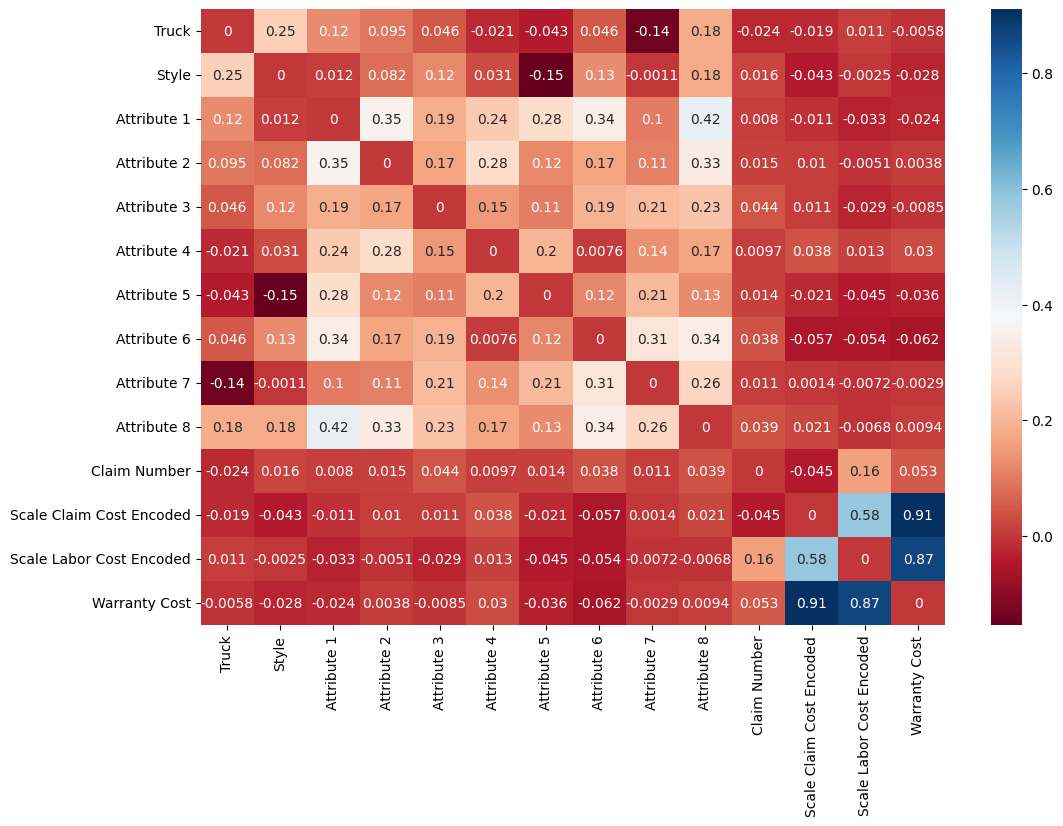

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap='RdBu', annot=True)
plt.show()

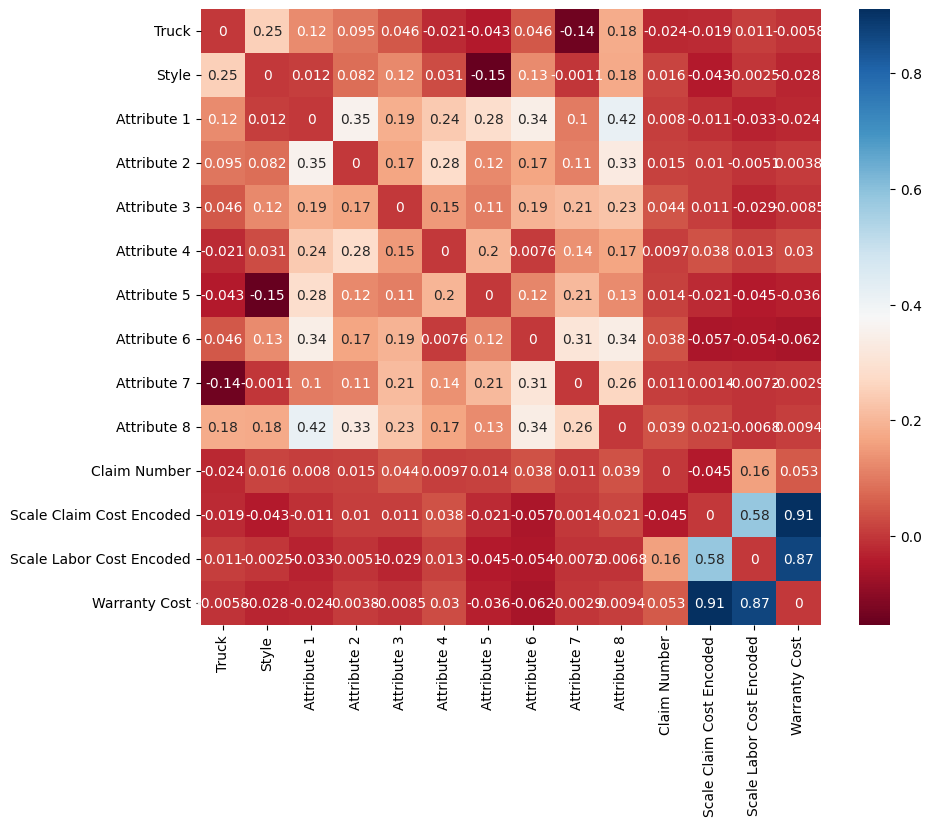

In [ ]:
# plt.figure(figsize=(10,8))
# fig = sns.heatmap(df_corr, cmap='RdBu', annot=True)
# plt.savefig('fig.pdf', format='pdf')

#Data Preprocessing


Since, columns values are close to mean, I am not applying any **normalizations** techniques.\
Warranty costs column is derived from Scale Claim cost and Scale Labor cost, they posses **multi-collinearity**. So, I am removing them.

In [61]:
df.drop(['Scale Claim Cost Encoded', 'Scale Labor Cost Encoded'], axis=1, inplace=True)
df.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number,Warranty Cost
0,1,1,1,83,181,204,264,281,290,294,9,4
1,1,1,1,83,181,204,264,281,290,294,1,6
2,1,1,1,83,181,204,264,281,290,294,1,6
3,1,1,1,83,181,204,264,281,290,294,1,2
4,2,1,2,84,181,205,265,282,291,295,2,4


#Modeling

In [62]:
X = df.drop(['Warranty Cost'], axis=1)
y = df['Warranty Cost']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [63]:
x_train.shape #(40962, 11)
x_test.shape #(17556, 11)
y_train.shape #(40962,)
y_test.shape #(17556, 1)

(17556,)

In [64]:
x_train.head()
# y_train.head()

,Truck,Style,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Claim Number
54944,35382,3,41,104,185,230,265,285,291,300,1
1260,765,1,9,84,182,206,266,282,291,296,2
66537,43547,4,26,97,183,207,265,283,291,302,1
7025,4208,4,39,111,185,235,265,283,291,302,1
49805,31703,4,47,117,185,235,271,284,291,302,2


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=5000))
# model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [66]:
# y_pred.shape
y_test.shape

(17556,)

In [67]:
y_pred1 = pd.DataFrame(y_pred).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)


,Warranty Cost,0
0,2,4
1,3,4
2,4,4
3,4,4
4,2,4
...,...,...
17551,3,4
17552,3,4
17553,4,4
17554,4,4


In [71]:
compare_res = pd.concat([y_test, y_pred1], axis=1).rename(columns = {0:'Predicted Value'})
compare_res

,Warranty Cost,Predicted Value
0,2,4
1,3,4
2,4,4
3,4,4
4,2,4
...,...,...
17551,3,4
17552,3,4
17553,4,4
17554,4,4


# Model Evaluation

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.49344953292321714
              precision    recall  f1-score   support

           2       0.18      0.00      0.00      2981
           3       0.26      0.06      0.09      3876
           4       0.51      0.97      0.66      8684
           5       0.00      0.00      0.00      1374
           6       0.00      0.00      0.00       397
           7       0.00      0.00      0.00       143
           8       0.00      0.00      0.00        73
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00         2

    accuracy                           0.49     17556
   macro avg       0.11      0.11      0.08     17556
weighted avg       0.34      0.49      0.35     17556

[[   2  164 2815    0    0    0    0    0    0]
 [   5  219 3652    0    0    0    0    0    0]
 [   1  241 8442    0    0    0    0    0    0]
 [   1  130 1243    0    0    0    0    0    0]
 [   0   50  347    0    0    0    0    0    0]
 [   1   20  122    0    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
y_proba = model.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba, multi_class='ovr')  # for multiclass


np.float64(0.7407464530281799)

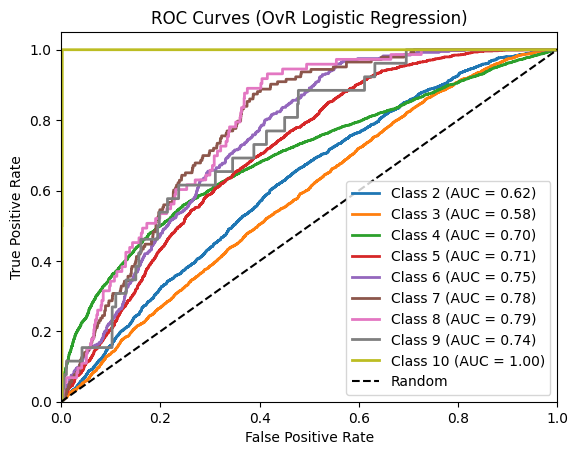

In [76]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize labels for multiclass
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(x_test)  # list of arrays per class

plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {cls} (AUC = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (OvR Logistic Regression)')
plt.legend(loc='lower right')
plt.show()


Since, OneVsRest Classifier didn't perform well, I am trying ogistic Regression with multi class options.

In [79]:
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

  # Multinomial logistic regression
  logreg_model = LogisticRegression(
      multi_class='multinomial',
      solver='lbfgs',
      max_iter=5000
  )

  logreg_model.fit(x_train, y_train)
  y_pred_logreg = logreg_model.predict(x_test)

  print("Logistic Regression (multinomial)")
  print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
  print(classification_report(y_test, y_pred_logreg))
  print(confusion_matrix(y_test, y_pred_logreg))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression (multinomial)
Accuracy: 0.49464570517202094
              precision    recall  f1-score   support

           2       0.00      0.00      0.00      2981
           3       0.44      0.00      0.01      3876
           4       0.49      1.00      0.66      8684
           5       0.00      0.00      0.00      1374
           6       0.00      0.00      0.00       397
           7       0.00      0.00      0.00       143
           8       0.00      0.00      0.00        73
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00         2

    accuracy                           0.49     17556
   macro avg       0.10      0.11      0.07     17556
weighted avg       0.34      0.49      0.33     17556

[[   0    3 2978    0    0    0    0    0    0]
 [   0   14 3862    0    0    0    0    0    0]
 [   0   14 8670    0    0    0    0    0    0]
 [   0    1 1373    0    0    0    0    0    0]
 [   0    0  397    0    0    0    0   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [81]:
from sklearn.metrics import roc_auc_score

y_test_array = y_test.values.ravel()   # ensure 1-D
y_proba = logreg_model.predict_proba(x_test)

roc_auc_ovr = roc_auc_score(y_test_array, y_proba, multi_class='ovr')
print("Multiclass ROC-AUC (OvR):", roc_auc_ovr)


Multiclass ROC-AUC (OvR): 0.5520537703762362


In [80]:
!pip install xgboost


In [83]:
from sklearn.preprocessing import LabelEncoder

# encode y so classes are 0,1,2,...,n-1
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.transform(y_test)

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_xgb)),
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(x_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(x_test)

y_pred_xgb_original = le.inverse_transform(y_pred_xgb)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 1. Accuracy, classification report, confusion matrix (use encoded y_test_xgb)
print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_xgb, y_pred_xgb))


XGBoost Classifier
Accuracy: 0.5090567327409433

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.15      0.21      2981
           1       0.32      0.21      0.25      3876
           2       0.57      0.88      0.69      8684
           3       0.20      0.06      0.09      1374
           4       0.21      0.01      0.01       397
           5       0.00      0.00      0.00       143
           6       0.00      0.00      0.00        73
           7       0.14      0.04      0.06        26
           8       0.00      0.00      0.00         2

    accuracy                           0.51     17556
   macro avg       0.20      0.15      0.15     17556
weighted avg       0.43      0.51      0.44     17556


Confusion Matrix:
 [[ 435  525 1928   88    2    1    0    2    0]
 [ 304  798 2678   90    2    1    3    0    0]
 [ 315  663 7617   87    1    0    0    1    0]
 [ 123  340  821   83    2    0    3    2    0]
 [  33   8

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGBoost ROC-AUC (macro, OvR): 0.801584781955891


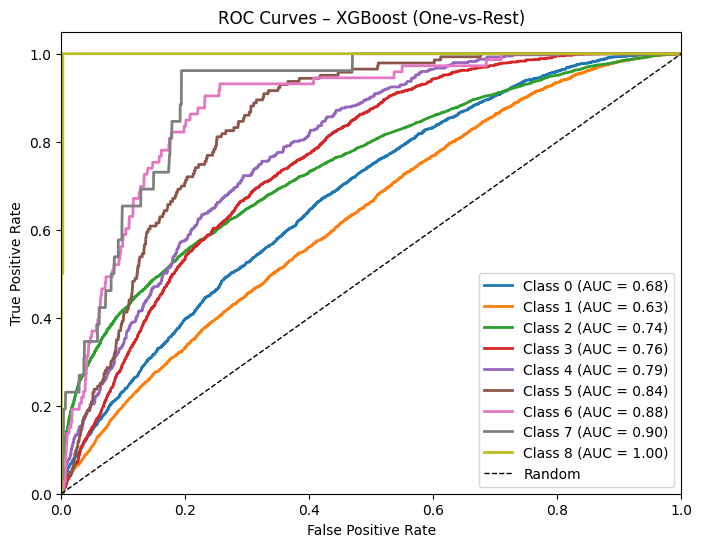

In [86]:

# 2. ROC–AUC (multiclass, OvR, macro average)
y_proba_xgb = xgb_model.predict_proba(x_test)  # (n_samples, n_classes)
classes = np.unique(y_train_xgb)
y_test_bin = label_binarize(y_test_xgb, classes=classes)

roc_auc_macro = roc_auc_score(
    y_test_bin,
    y_proba_xgb,
    average='macro',
    multi_class='ovr'
)
print("\nXGBoost ROC-AUC (macro, OvR):", roc_auc_macro)

# 3. ROC curves visualization for each class (One-vs-Rest)
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_xgb[:, i])
    roc_auc_i = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {cls} (AUC = {roc_auc_i:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves – XGBoost (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


## Comparing 3 model performances

| Model                               | Accuracy | ROC–AUC (macro, OvR) | Notes                                                                 |
|-------------------------------------|----------|----------------------|-----------------------------------------------------------------------|
| OneVsRestClassifier (LogReg, OvR)   | 0.4934        | 0.7407               | Only ROC–AUC computed; performance is moderate on average.            |
| LogisticRegression (multinomial)    | 0.4946   | 0.5521               | Collapses mostly to one class; very poor recall for minority classes. |
| XGBClassifier (multiclass)          | 0.5091   | 0.8016               | Best ROC–AUC and better minority class recall; chosen as final model. |



